Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Importing Data

In [2]:
df = pd.read_csv (r'/Users/amanjalan/Downloads/UMichMLTrial(2).csv')

In [3]:
df.drop('Timestamp', axis = 1, inplace = True)

Making the columns readable now

In [4]:
df.rename(columns = {'Did you get into the University of Michigan?':'Accepted'},inplace = True)
df.rename(columns = {'What was the nature of your application to the University of Michigan?':'EA/RA','If you took the SAT, what was your score out of 1600 (Ex. 1500)?':'SAT','If you took the ACT, what was your score out of 36 (Ex. 34)?':'ACT'},inplace = True)
df.rename(columns = {'Where would you rank yourself academically in class?':'Rank','What College within the University of Michigan did you apply to?':'College'},inplace = True)
df.rename(columns = {'How many SAT Subject Test Scores were submitted with a score of >= 700?':'SAT II'},inplace = True)
df.rename(columns = {'How many AP Test Scores were submitted with a score of >= 3?':'AP', 'How many IB Test Scores were submitted with a score of >= 5?':'IB', 'What gender identity do you most identify with?':'Gender','What was your residency status when you applied to the University of Michigan?':'Residency Status', 'Were you considered a legacy (i.e. your parents or siblings went to the University of Michigan)?':'Legacy', 'Were you considered a first-generation college student (i.e. you were the first in your family to go to college)?':'First-Gen', 'Did you ask for Financial Aid?':'Financial Aid'}, inplace = True)
df.rename(columns = {'Were you a part of Student government at your school?':'Student Gov','Did you have any notable leadership positions in high school (i.e. President/Vice-President of a club)?':'Leadership', 'Please indicate your ethnicity?':'Ethnicity','Were you a member of a Sports team in high school (Dedicated 100+ hours)?':'Sports','Did you volunteer in high school (Dedicated 100+ hours)?':'Volunteer','Did you participate in the performing arts (dance, drama and other forms of artistic expressions) while in high school (100+ hours)?':'Performing Arts',"If you'd like to be considered for the Amazon gift card raffle, please enter an email id that we can send the gift card to (Optional)":'Email'}, inplace = True)

In [5]:
df.head()

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
0,Yes,College of Engineering (CoE),Early Action / EA,NaN,35.0,Top 50%,2 and above,1-3,0,Male,...,International,No,No,No,Yes,Yes,No,Yes,No,NaN
1,Yes,College of Engineering (CoE),Early Action / EA,1490.0,NaN,Top 5%,1,0,0,Female,...,International,No,No,No,Yes,Yes,Yes,No,No,NaN
2,Yes,College of Engineering (CoE),Early Action / EA,1500.0,NaN,Top 10%,2 and above,1-3,0,Female,...,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,NaN
3,Yes,College of Engineering (CoE),Early Action / EA,1560.0,NaN,Top 20%,2 and above,10 and above,0,Female,...,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,nityabaddam@gmail.com
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,1540.0,NaN,Top 10%,1,10 and above,0,Male,...,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,supertanish202@gmail.com


Removing Invalid Entries: 1) No SAT and ACT 2) insnanely low SAT/ACT scores (1000/11) 3) SAT Score not ending with 0

In [6]:
ScamEntry = (df['SAT'].isnull() & df['ACT'].isnull())

In [7]:
ScamIndices = df[ScamEntry].index

In [8]:
df.drop(ScamIndices, inplace = True)

In [9]:
df.reset_index(drop=True, inplace = True)

TODO: Need to check manually

In [10]:
df[(df['ACT'] <= 11)]

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
151,No,"College of Literature, Science, and the Arts (...",Early Action / EA,1150.0,0.0,Top 50%,0,0,0,Male,...,In-State,No,Yes,Yes,No,No,No,Yes,No,mrgraffittiart@gmail.com
641,Yes,Other,Regular Decision / RD,5.0,5.0,Top 50%,1,0,0,Male,...,International,No,Yes,Yes,Yes,No,Yes,No,Yes,voluntary bias much?


In [11]:
df.drop(df.index[641],inplace = True)

In [12]:
df.reset_index(drop=True, inplace = True)

In [13]:
df[(df['SAT'] < 1000)]

,Accepted,College,EA/RA,SAT,ACT,Rank,SAT II,AP,IB,Gender,...,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Email
636,Yes,Ross School of Business,Early Action / EA,800.0,17.0,Top 10%,0,0,0,Female,...,In-State,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Amills1600@yahoo.com


In [14]:
df.drop(df.index[636],inplace = True)

In [15]:
df.reset_index(drop=True, inplace = True)

In [16]:
ScoreTemp = df['SAT'].dropna()

In [17]:
ScoreTempIndex = ScoreTemp[ScoreTemp%10 != 0].index

In [18]:
df.drop(ScoreTempIndex, inplace = True)

In [19]:
df.reset_index(drop=True, inplace = True)

Seperate Email Id and turn it into lottery (and filter out lottery)

In [20]:
Lottery = df['Email']

In [21]:
Lottery.dropna(inplace = True)

In [22]:
Lottery.reset_index(drop=True, inplace = True)

In [23]:
df.drop('Email',axis = 1,inplace = True)

Convert SAT and ACT score to one column

In [24]:
def ConvertScore(SatScore):
    if (np.isnan(SatScore)):
        return 0
    elif (SatScore >= 1570 and SatScore <= 1600):
        return 36
    elif (SatScore >= 1530 and SatScore <= 1560):
        return 35
    elif (SatScore >= 1490 and SatScore <= 1520):
        return 34
    elif (SatScore >= 1450 and SatScore <= 1480):
        return 33
    elif (SatScore >= 1420 and SatScore <= 1440):
        return 32
    elif (SatScore >= 1390 and SatScore <= 1410):
        return 31
    elif (SatScore >= 1360 and SatScore <= 1380):
        return 30
    elif (SatScore >= 1330 and SatScore <= 1350):
        return 29
    elif (SatScore >= 1300 and SatScore <= 1320):
        return 28
    elif (SatScore >= 1260 and SatScore <= 1290):
        return 27
    elif (SatScore >= 1230 and SatScore <= 1250):
        return 26
    elif (SatScore >= 1200 and SatScore <= 1220):
        return 25
    elif (SatScore >= 1160 and SatScore <= 1190):
        return 24
    elif (SatScore >= 1130 and SatScore <= 1150):
        return 23
    elif (SatScore >= 1100 and SatScore <= 1120):
        return 22
    elif (SatScore >= 1060 and SatScore <= 1090):
        return 21
    elif (SatScore >= 1030 and SatScore <= 1050):
        return 20
    elif (SatScore >= 990 and SatScore <= 1020):
        return 19
    elif (SatScore >= 960 and SatScore <= 980):
        return 18
    elif (SatScore >= 920 and SatScore <= 950):
        return 17
    elif (SatScore >= 880 and SatScore <= 910):
        return 16
    elif (SatScore >= 830 and SatScore <= 870):
        return 15
    elif (SatScore >= 780 and SatScore <= 820):
        return 14
    elif (SatScore >= 730 and SatScore <= 770):
        return 13
    elif (SatScore >= 690 and SatScore <= 720):
        return 12
    elif (SatScore >= 650 and SatScore <= 680):
        return 11
    elif (SatScore >= 620 and SatScore <= 640):
        return 10
    elif (SatScore >= 590 and SatScore <= 610):
        return 9
    else:
        return 0
    
    

In [25]:
df['ConvertedAct'] = df.SAT.apply(ConvertScore)

In [26]:
def ActFix(Score):
    if (np.isnan(Score)):
        return 0
    else:
        return Score

In [27]:
df['ACT'] = df.ACT.apply(ActFix)

In [28]:
def ChooseScore(row):
    if (row.ACT >= row.ConvertedAct):
        return row.ACT
    else:
        return row.ConvertedAct

In [29]:
df['Standardized Score'] = df.apply(ChooseScore, axis = 1)

In [30]:
df.drop(['SAT','ACT','ConvertedAct'], axis = 1, inplace = True)

In [31]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


Data Visualization

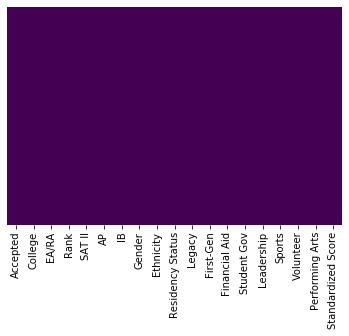

In [32]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

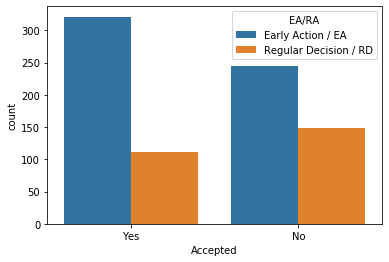

In [33]:
sns.countplot(x = 'Accepted', hue = 'EA/RA', data = df)

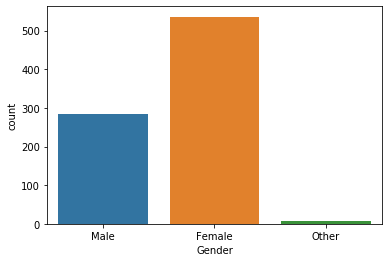

In [34]:
sns.countplot(x = 'Gender',data = df)

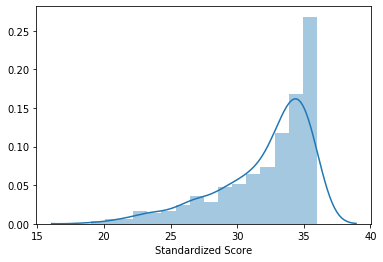

In [35]:
sns.distplot(df['Standardized Score'])

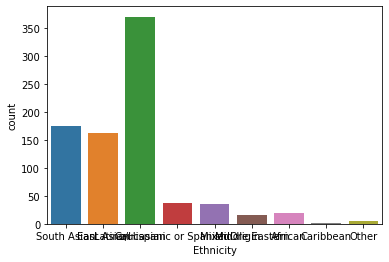

In [36]:
sns.countplot(x = 'Ethnicity', data = df)

Converting Categorical Values

In [37]:
#Accepted = pd.get_dummies(df['Accepted'],drop_first = True).head()
#EARA = pd.get_dummies(df['EA/RA'],drop_first = True).head()
#College = pd.get_dummies(df['College'],drop_first = True).head()
#Rank = pd.get_dummies(df['Rank'],drop_first = True).head()
#SATII = pd.get_dummies(df['SAT II'],drop_first = True).head()




In [38]:
#df = pd.concat([Accepted, EARA, df],axis = 1)

In [39]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


In [40]:
df[((df['Standardized Score'] == 36) & (df['Accepted'] == 'Yes'))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 8 to 785
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Accepted            49 non-null     object 
 1   College             49 non-null     object 
 2   EA/RA               49 non-null     object 
 3   Rank                49 non-null     object 
 4   SAT II              49 non-null     object 
 5   AP                  49 non-null     object 
 6   IB                  49 non-null     object 
 7   Gender              49 non-null     object 
 8   Ethnicity           49 non-null     object 
 9   Residency Status    49 non-null     object 
 10  Legacy              49 non-null     object 
 11  First-Gen           49 non-null     object 
 12  Financial Aid       49 non-null     object 
 13  Student Gov         49 non-null     object 
 14  Leadership          49 non-null     object 
 15  Sports              49 non-null     object 
 16  Volunteer

Convert Standardized Score into a log Distribution

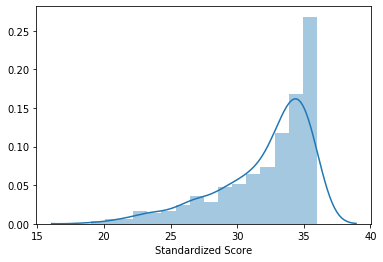

In [41]:
sns.distplot(df['Standardized Score'])

In [42]:
#df['Standardized Score'] = np.log10(df['Standardized Score'])

In [43]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,35.0
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,34.0
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,34.0
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,35.0
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,35.0


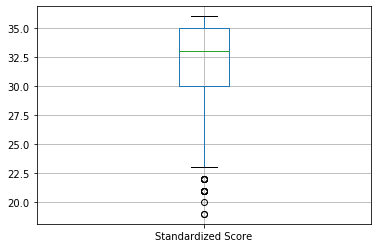

In [44]:
df.boxplot(column = 'Standardized Score')

In [45]:
df['Standardized Score'].skew()

-1.2081024787574712

In [46]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

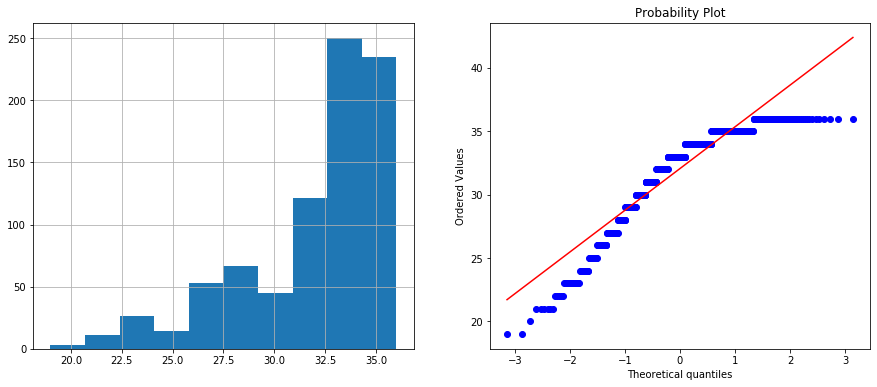

-1.2081024787574712

In [47]:
diagnostic_plots(df, 'Standardized Score')
df['Standardized Score'].skew()

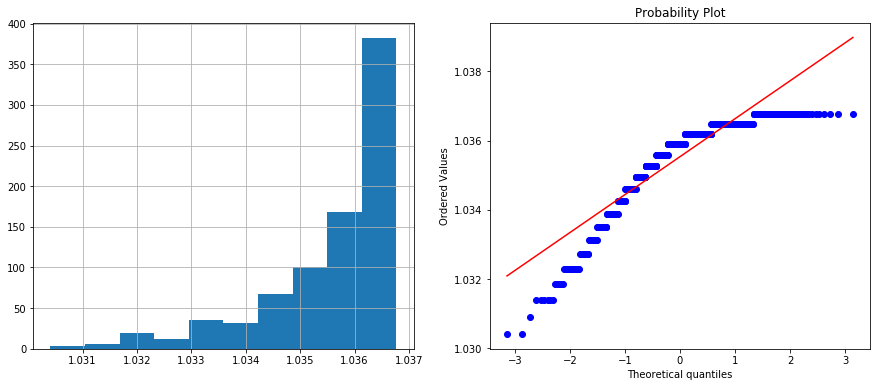

-1.486584052954531

In [48]:
df['NormStan']= (df['Standardized Score']+1)**(1/100)
diagnostic_plots(df,'NormStan')
df['NormStan'].skew()

Optimal lambda:  6.005567353109777


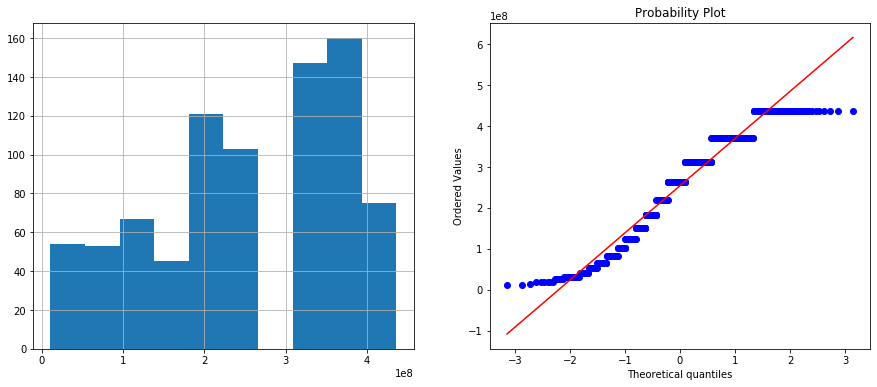

-0.2928473356864345

In [49]:
df['Fare_boxcox'], param = stats.boxcox(df['Standardized Score']+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Fare_boxcox')
df['Fare_boxcox'].skew()

In [50]:
#After trying out several types of transoformation, BoxCox transformation is able to efficinectly bring skewness to -0.3

In [51]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,...,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score,NormStan,Fare_boxcox
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,...,No,No,Yes,Yes,No,Yes,No,35.0,1.036485,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,...,No,No,Yes,Yes,Yes,No,No,34.0,1.036193,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,...,No,No,Yes,Yes,No,Yes,Yes,34.0,1.036193,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,...,No,Yes,Yes,Yes,No,Yes,Yes,35.0,1.036485,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,...,No,Yes,No,Yes,No,Yes,Yes,35.0,1.036485,3.697647e+08


Optimal lambda:  6.005567353109777


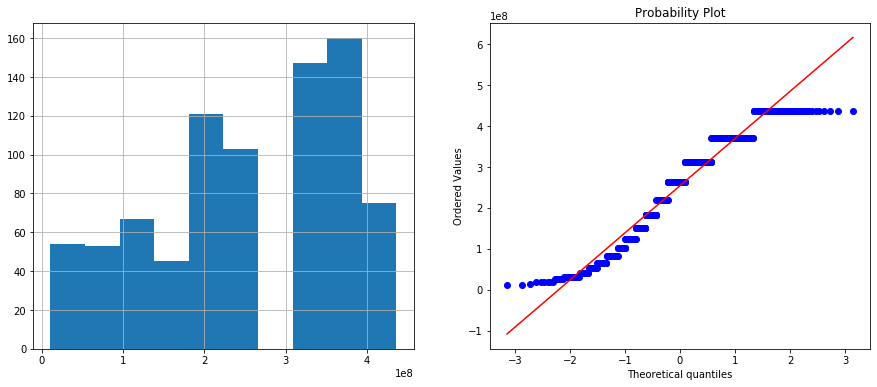

-0.2928473356864345

In [52]:
df['Standardized Score'], param = stats.boxcox(df['Standardized Score']+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df, 'Standardized Score')
df['Standardized Score'].skew()

In [53]:
df.drop(['NormStan','Fare_boxcox'], axis = 1, inplace = True)
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08


In [54]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [55]:
categorical_features.remove('Accepted')

In [56]:
categorical_features

['College',
 'EA/RA',
 'Rank',
 'SAT II',
 'AP',
 'IB',
 'Gender',
 'Ethnicity',
 'Residency Status',
 'Legacy',
 'First-Gen',
 'Financial Aid',
 'Student Gov',
 'Leadership',
 'Sports',
 'Volunteer',
 'Performing Arts']

In [57]:
df

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 2%,0,1-3,0,Male,Caucasian,In-State,No,No,No,No,Yes,Yes,Yes,No,1.506326e+08
821,No,College of Engineering (CoE),Regular Decision / RD,Top 2%,2 and above,0,0,Male,South Asian,International,No,No,No,No,No,No,No,No,3.122127e+08
822,No,College of Engineering (CoE),Early Action / EA,Top 2%,2 and above,1-3,0,Female,East Asian,International,No,No,No,Yes,Yes,Yes,No,No,1.822743e+08
823,No,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 20%,0,1-3,0,Male,Caucasian,In-State,No,No,No,No,Yes,Yes,Yes,No,1.506326e+08


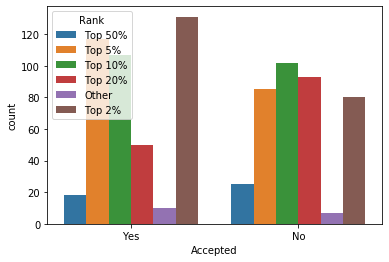

In [58]:
sns.countplot(x = 'Accepted', hue = 'Rank', data = df)

In [59]:
(df['Gender'] == 'Other').sum()/825*100

0.7272727272727273

Handling Rare Categorical Features

In [60]:
categorical_features

['College',
 'EA/RA',
 'Rank',
 'SAT II',
 'AP',
 'IB',
 'Gender',
 'Ethnicity',
 'Residency Status',
 'Legacy',
 'First-Gen',
 'Financial Aid',
 'Student Gov',
 'Leadership',
 'Sports',
 'Volunteer',
 'Performing Arts']

In [61]:
for feature in categorical_features:
    temp = df.groupby(feature)['Accepted'].count()/len(df)
    temp_df = temp[temp > 0.01].index
    df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare_Var')

In [62]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08


In [63]:
df['Ethnicity'].unique()

array(['South Asian', 'East Asian', 'Caucasian',
       'Latino/Hispanic or Spanish Origin', 'Mixed', 'Middle Eastern',
       'African', 'Rare_Var'], dtype=object)

In [64]:
df.groupby('Ethnicity')['Accepted'].count()

Ethnicity
African                               19
Caucasian                            371
East Asian                           163
Latino/Hispanic or Spanish Origin     38
Middle Eastern                        16
Mixed                                 35
Rare_Var                               7
South Asian                          176
Name: Accepted, dtype: int64

In [65]:
df

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,College of Engineering (CoE),Early Action / EA,Top 50%,2 and above,1-3,0,Male,South Asian,International,No,No,No,Yes,Yes,No,Yes,No,3.697647e+08
1,Yes,College of Engineering (CoE),Early Action / EA,Top 5%,1,0,0,Female,South Asian,International,No,No,No,Yes,Yes,Yes,No,No,3.122127e+08
2,Yes,College of Engineering (CoE),Early Action / EA,Top 10%,2 and above,1-3,0,Female,South Asian,Out-of-State,No,No,No,Yes,Yes,No,Yes,Yes,3.122127e+08
3,Yes,College of Engineering (CoE),Early Action / EA,Top 20%,2 and above,10 and above,0,Female,South Asian,Out-of-State,No,No,Yes,Yes,Yes,No,Yes,Yes,3.697647e+08
4,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 10%,1,10 and above,0,Male,South Asian,Out-of-State,No,No,Yes,No,Yes,No,Yes,Yes,3.697647e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Yes,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 2%,0,1-3,0,Male,Caucasian,In-State,No,No,No,No,Yes,Yes,Yes,No,1.506326e+08
821,No,College of Engineering (CoE),Regular Decision / RD,Top 2%,2 and above,0,0,Male,South Asian,International,No,No,No,No,No,No,No,No,3.122127e+08
822,No,College of Engineering (CoE),Early Action / EA,Top 2%,2 and above,1-3,0,Female,East Asian,International,No,No,No,Yes,Yes,Yes,No,No,1.822743e+08
823,No,"College of Literature, Science, and the Arts (...",Early Action / EA,Top 20%,0,1-3,0,Male,Caucasian,In-State,No,No,No,No,Yes,Yes,Yes,No,1.506326e+08


In [66]:
## Feature Scaling

In [67]:
categorical_features

['College',
 'EA/RA',
 'Rank',
 'SAT II',
 'AP',
 'IB',
 'Gender',
 'Ethnicity',
 'Residency Status',
 'Legacy',
 'First-Gen',
 'Financial Aid',
 'Student Gov',
 'Leadership',
 'Sports',
 'Volunteer',
 'Performing Arts']

In [68]:
for feature in categorical_features:
    print(feature)
    df[feature] = pd.factorize(df[feature])[0]

College
EA/RA
Rank
SAT II
AP
IB
Gender
Ethnicity
Residency Status
Legacy
First-Gen
Financial Aid
Student Gov
Leadership
Sports
Volunteer
Performing Arts


In [69]:
df['SAT II'].value_counts()

2    374
0    310
1    141
Name: SAT II, dtype: int64

In [70]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.697647e+08
1,Yes,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,3.122127e+08
2,Yes,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.122127e+08
3,Yes,0,0,3,0,2,0,1,0,1,0,0,1,0,0,0,0,1,3.697647e+08
4,Yes,1,0,2,1,2,0,0,0,1,0,0,1,1,0,0,0,1,3.697647e+08


In [71]:
feature_scale=[feature for feature in df.columns if feature not in ['Accepted']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [72]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.697647e+08
1,Yes,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,3.122127e+08
2,Yes,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.122127e+08
3,Yes,0,0,3,0,2,0,1,0,1,0,0,1,0,0,0,0,1,3.697647e+08
4,Yes,1,0,2,1,2,0,0,0,1,0,0,1,1,0,0,0,1,3.697647e+08


In [73]:
df = pd.concat([df[['Accepted']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [74]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844411
1,Yes,0.000000,0.0,0.2,0.5,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.709015
2,Yes,0.000000,0.0,0.4,0.0,0.00,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.709015
3,Yes,0.000000,0.0,0.6,0.0,0.50,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.844411
4,Yes,0.333333,0.0,0.4,0.5,0.50,0.0,0.0,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.844411


In [75]:
df['Standardized Score'].skew()

-0.29284733568643545

Randomize Data


In [76]:
df['Accepted'].unique()

array(['Yes', 'No'], dtype=object)

In [77]:
df['Accepted']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
820    Yes
821     No
822     No
823     No
824    Yes
Name: Accepted, Length: 825, dtype: object

In [78]:
#df['Accepted'] = pd.get_dummies(df['Accepted'],drop_first = True).head()

In [79]:
df

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844411
1,Yes,0.000000,0.0,0.2,0.5,0.25,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.709015
2,Yes,0.000000,0.0,0.4,0.0,0.00,0.0,0.5,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.709015
3,Yes,0.000000,0.0,0.6,0.0,0.50,0.0,0.5,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.844411
4,Yes,0.333333,0.0,0.4,0.5,0.50,0.0,0.0,0.000000,0.5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.844411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Yes,0.333333,0.0,1.0,1.0,0.00,0.0,0.0,0.285714,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.328884
821,No,0.000000,1.0,1.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.709015
822,No,0.000000,0.0,1.0,0.0,0.00,0.0,0.5,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.403323
823,No,0.333333,0.0,0.6,1.0,0.00,0.0,0.0,0.285714,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.328884


In [80]:
df['Accepted'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
df = df.sample(frac=1).reset_index(drop=True)

In [82]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,Yes,0.333333,0.0,1.0,0.0,0.75,0.0,0.0,0.142857,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.844411
1,Yes,0.666667,0.0,0.2,0.5,0.00,0.0,0.5,0.142857,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.844411
2,No,0.333333,0.0,0.6,0.0,1.00,0.0,0.5,0.142857,0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.709015
3,Yes,0.000000,0.0,0.6,0.0,1.00,0.0,0.0,0.428571,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.709015
4,No,0.333333,0.0,0.6,1.0,0.75,0.0,0.5,0.714286,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.211929


In [83]:
df['Accepted'].value_counts()

Yes    433
No     392
Name: Accepted, dtype: int64

Convert Accepted into numerical column

In [84]:
df['Accepted'] = df.Accepted.map({'Yes':1, 'No':0})

In [85]:
df.head()

,Accepted,College,EA/RA,Rank,SAT II,AP,IB,Gender,Ethnicity,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Leadership,Sports,Volunteer,Performing Arts,Standardized Score
0,1,0.333333,0.0,1.0,0.0,0.75,0.0,0.0,0.142857,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.844411
1,1,0.666667,0.0,0.2,0.5,0.00,0.0,0.5,0.142857,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.844411
2,0,0.333333,0.0,0.6,0.0,1.00,0.0,0.5,0.142857,0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.709015
3,1,0.000000,0.0,0.6,0.0,1.00,0.0,0.0,0.428571,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.709015
4,0,0.333333,0.0,0.6,1.0,0.75,0.0,0.5,0.714286,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.211929


In [86]:
df.Accepted.value_counts()

1    433
0    392
Name: Accepted, dtype: int64

In [87]:
df.skew()

Accepted             -0.099698
College               0.826103
EA/RA                 0.797223
Rank                  0.326150
SAT II               -0.153540
AP                    0.187969
IB                    3.377161
Gender               -0.507069
Ethnicity             1.234751
Residency Status     -0.164412
Legacy                1.947397
First-Gen             2.145841
Financial Aid        -0.148555
Student Gov          -0.903079
Leadership            1.173724
Sports               -0.546254
Volunteer             1.367186
Performing Arts       0.075342
Standardized Score   -0.292847
dtype: float64

Feature Selection

In [88]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'Accepted'), df['Accepted'], test_size=0.3, random_state = 9)

In [91]:
y_train.sum()

304

In [92]:
y_test.sum()

129

In [93]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [94]:
feature_sel_model.get_support()

array([False,  True, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False, False, False,  True])

In [95]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 18
selected features: 9


In [96]:
selected_feat

Index(['EA/RA', 'AP', 'Gender', 'Residency Status', 'Legacy', 'First-Gen',
       'Financial Aid', 'Student Gov', 'Standardized Score'],
      dtype='object')

In [97]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [98]:
X_train.head()

,EA/RA,AP,Gender,Residency Status,Legacy,First-Gen,Financial Aid,Student Gov,Standardized Score
249,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.844411
289,0.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.709015
742,0.0,0.75,0.5,1.0,0.0,0.0,1.0,1.0,0.403323
808,1.0,0.75,0.0,0.5,0.0,0.0,0.0,0.0,0.403323
757,0.0,0.75,0.5,0.5,0.0,0.0,0.0,1.0,0.844411


Building Model

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel = LogisticRegression()

In [101]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
predictions = logmodel.predict(X_test)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       119
           1       0.63      0.69      0.66       129

    accuracy                           0.63       248
   macro avg       0.63      0.63      0.63       248
weighted avg       0.63      0.63      0.63       248



In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_test, predictions)

array([[67, 52],
       [40, 89]])